In [196]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [197]:
data_df = pd.read_csv("coop_interview_dataset.csv")

In [198]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scanpy as sc

C:\Users\danny\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


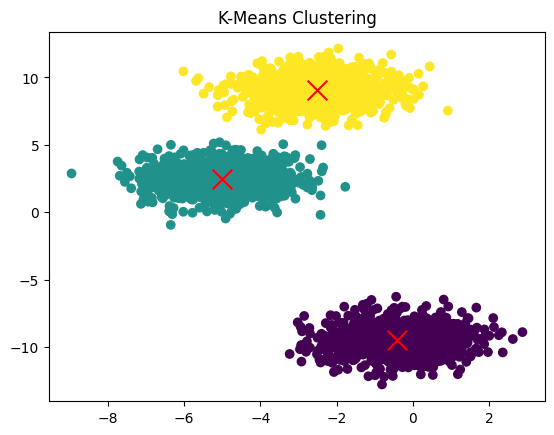

In [199]:
# Create some sample data for clustering
n_samples = len(data_df)
n_features = len(data_df.columns)
n_clusters = 3
random_state = 42

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Create a KMeans instance with the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

# Fit the KMeans model to the data
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1,], marker='x', s=200, c='red')
plt.title("K-Means Clustering")
plt.show()


In [200]:
data_df

,Unnamed: 0,HES4,ISG15,TNFRSF18,TNFRSF4,RP4-758J18.2,MIB2,FAM213B,MMEL1,TNFRSF25,...,PRDM15,SLC37A1,NDUFV3,CBS,AP001046.5,RRP1B,CSTB,ITGB2,MCM3AP-AS1,S100B
0,CATAGTCTCCCTTG.1,0.0,2.836986,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,2.200788,0.0,0.0,0.0
1,CTACGCACGGAAAT.1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.965008,0.0,0.0,0.0
2,CGGCGAACCATTCT.1,0.0,0.000000,0.0,0.0,1.328932,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,CGTTAACTTCCGTC.1,0.0,0.000000,0.0,0.0,2.144268,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,2.144268,0.0,0.0,0.0
4,AGCATTCTGTCTTT.1,0.0,1.998442,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,GATTACCTTATTCC.1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,2.530927,0.0,0.0,0.0
2796,GAAACCTGTTCTCA.1,0.0,2.493784,0.0,0.0,0.000000,0.0,0.0,0.0,1.548059,...,0.0,0.0,0.0,0.0,0.0,0.0,2.128787,0.0,0.0,0.0
2797,GTGTATCTTTCGGA.1,0.0,1.520663,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,4.123570,0.0,0.0,0.0
2798,GGAACACTAGGCGA.1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,2.308365,0.0,0.0,0.0


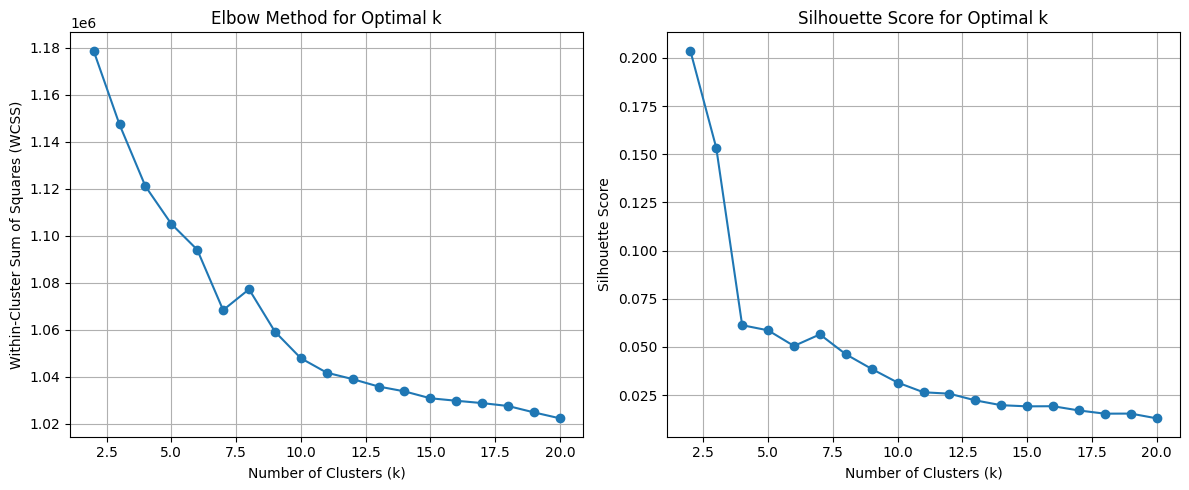

Optimal number of clusters based on Elbow Method: 6
Optimal number of clusters based on Silhouette Score: 2


In [201]:
# Extract the numeric values without the first column (CellName)
gene_expression_data = data_df.iloc[:, 1:].values

# Define a range of k values (number of clusters) to test
k_values = range(2, 21)  # Adjust the range as needed

# Initialize lists to store the WCSS and Silhouette Scores for each k
wcss = []
silhouette_scores = []

# Calculate the WCSS and Silhouette Score for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    cluster_assignments = kmeans.fit_predict(gene_expression_data)
    
    # Calculate WCSS
    wcss.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(gene_expression_data, cluster_assignments)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()

# Plot the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()

plt.tight_layout()
plt.show()

# Find the k with the highest Silhouette Score
optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]

# Find the k based on the "elbow" in the WCSS plot (manually or programmatically)
# Here, we'll use a manual approach to find the "elbow" point.
# You can use an automated method if desired.
elbow_point = 6  # Adjust this value based on your visual inspection of the WCSS plot

print(f'Optimal number of clusters based on Elbow Method: {elbow_point}')
print(f'Optimal number of clusters based on Silhouette Score: {optimal_k_silhouette}')

# You can choose the optimal k based on the comparison of both methods and your domain knowledge.


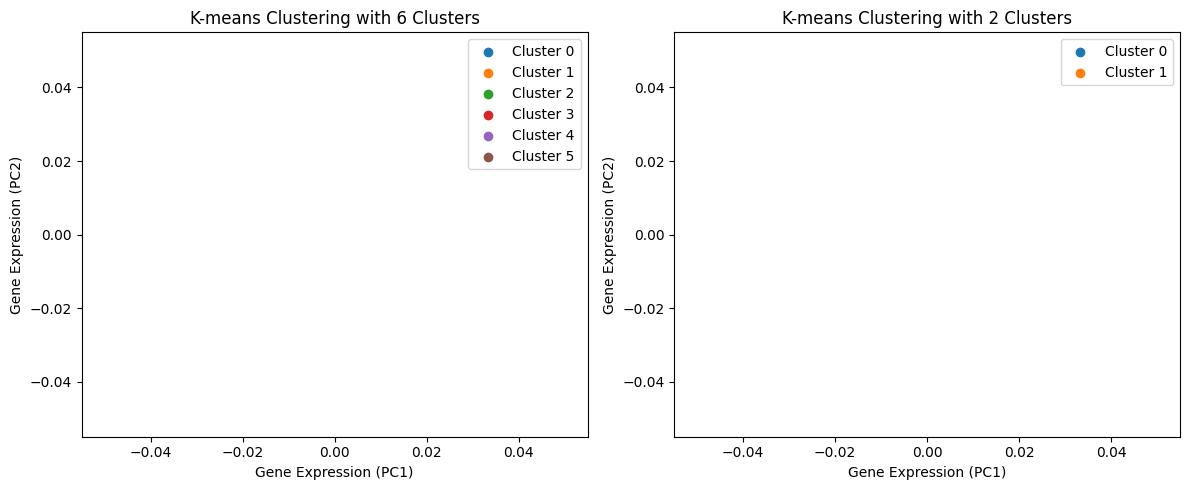

In [202]:
# Choose the number of clusters (k)
k_values = [6, 2]  # List of k values

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Create an AnnData object from your gene expression data
adata = sc.AnnData(gene_expression_data)

cluster_assignments = {}

for idx, k in enumerate(k_values):
    # Initialize and fit the K-means model
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(gene_expression_data)

    # Get cluster assignments for each cell
    cluster_assignments[k] = kmeans.labels_

    # Perform PCA for visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(gene_expression_data)

    # Scatter plot the data points with different colors for each cluster
    for i in range(k):
        axes[idx].scatter(reduced_data[cluster_assignments == i, 0], reduced_data[cluster_assignments == i, 1], label=f'Cluster {i}')

    axes[idx].set_title(f'K-means Clustering with {k} Clusters')
    axes[idx].legend()

    # Set axis labels
    axes[idx].set_xlabel('Gene Expression (PC1)')
    axes[idx].set_ylabel('Gene Expression (PC2)')

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()


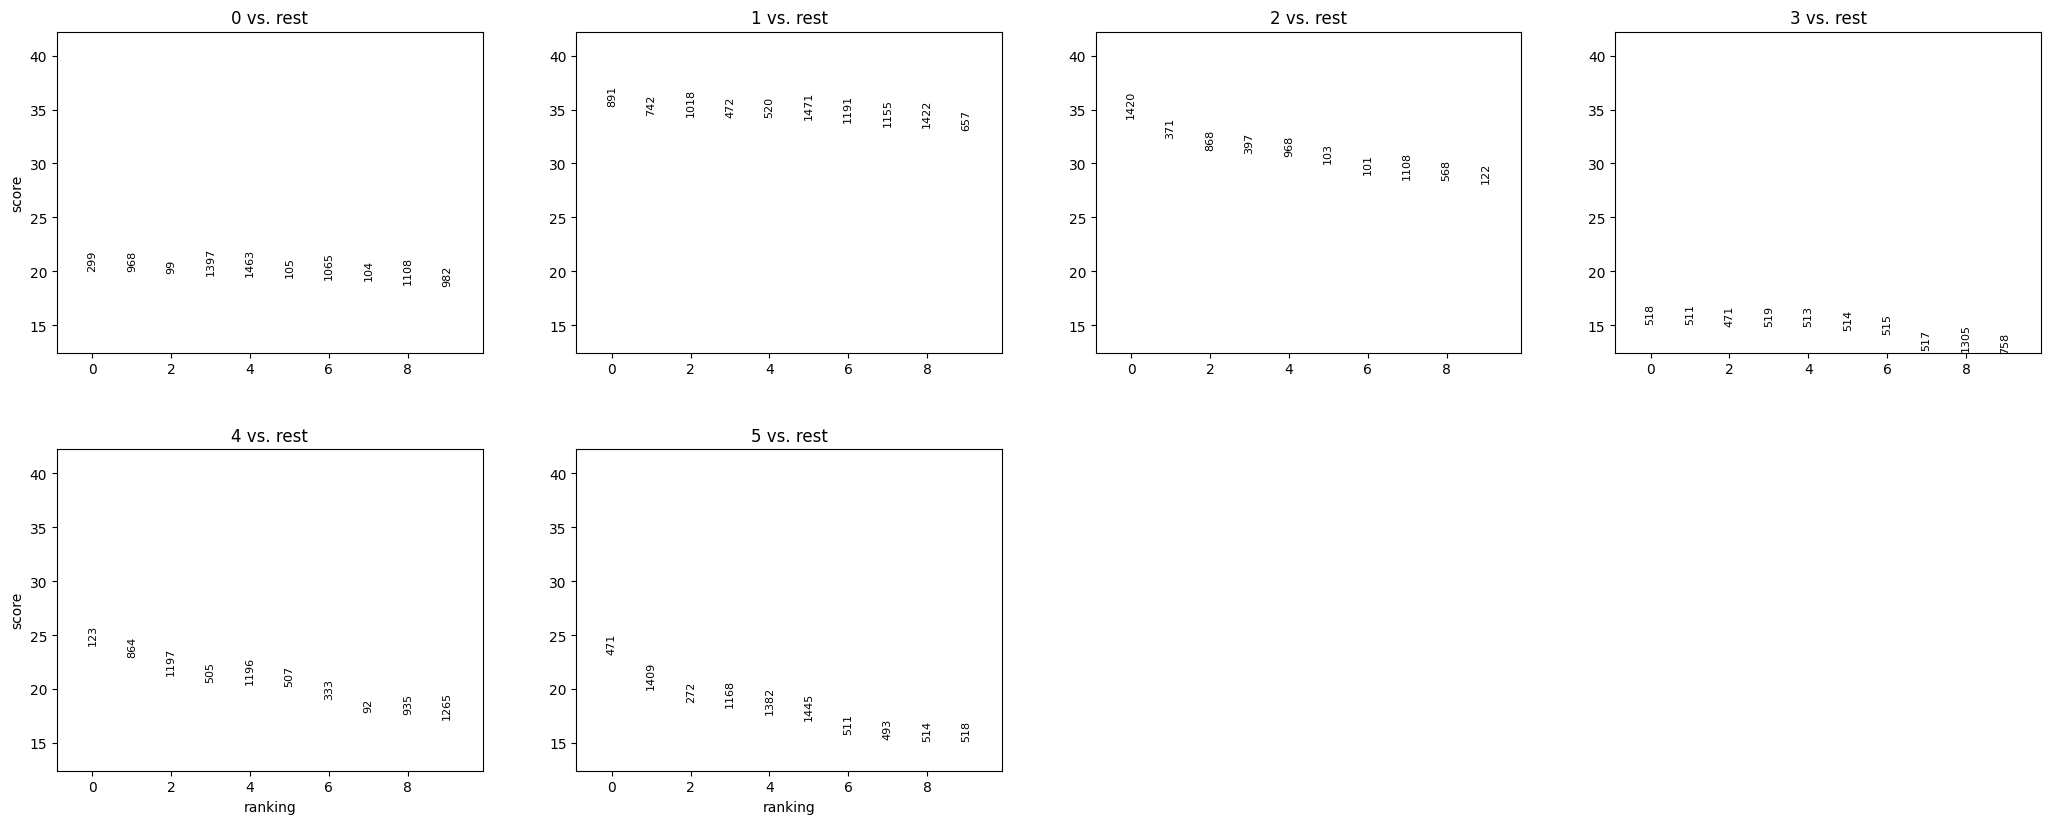

In [203]:
# Convert cluster assignments to 'category' data type
adata.obs['kmeans_clusters'] = pd.Categorical(cluster_assignments[6])

# Identify marker genes for each cluster
sc.tl.rank_genes_groups(adata, groupby='kmeans_clusters', method='wilcoxon')

# Visualize marker genes
sc.pl.rank_genes_groups(adata, n_genes=10)

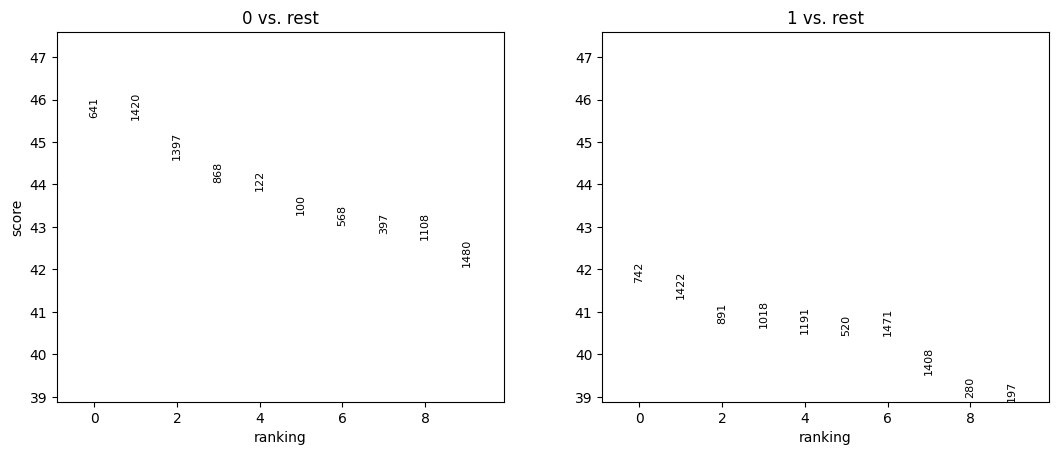

In [204]:
# Convert cluster assignments to 'category' data type
adata.obs['kmeans_clusters'] = pd.Categorical(cluster_assignments[2])

# Identify marker genes for each cluster
sc.tl.rank_genes_groups(adata, groupby='kmeans_clusters', method='wilcoxon')

# Visualize marker genes
sc.pl.rank_genes_groups(adata, n_genes=10)